In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

C:\Users\user\AppData\Local\Temp\ipykernel_16028\1219767664.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ds=pd.read_csv("House_Price.csv")
ds.head()

,Flat_Price,EMI_Starts,BHK,css-11nfaq3,Unnamed: 4,HOUSE_TYPE,Unnamed: 6,Unnamed: 7,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,6.0,BHK,Independent House,Independent,House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,5.0,BHK,Independent House,Independent,House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,4.0,BHK,Independent House,Independent,House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


In [3]:
#grouping by area_type
ds.groupby('Location')['Location'].agg('count')

Location
Abdalpur, Kolkata          2
Adarsha Nagar, Kolkata     2
Agarpara, Kolkata         38
Airport, Kolkata           4
Alipore, Kolkata          24
                          ..
Ultadanga, Kolkata         2
Uttarbhag, Kolkata         2
VIP Nagar, Kolkata         4
Vedic Village, Kolkata     4
Ward No 113, Kolkata      12
Name: Location, Length: 201, dtype: int64

In [4]:
ds2=ds.drop(['css-11nfaq3','Unnamed: 4','Unnamed: 6','Unnamed: 7','Purpose','Area_Type','Owner_name','Owner_type'],axis='columns')
ds2.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sq.ft,Price_per_sq.ft
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft


In [5]:
ds2.shape

(3968, 7)

In [6]:
#data_cleaning
#finding null columns
ds2.isnull().sum()

Flat_Price         0
EMI_Starts         0
BHK                0
HOUSE_TYPE         0
Location           2
Total_Sq.ft        0
Price_per_sq.ft    0
dtype: int64

In [7]:
#dropping null rows
ds3=ds2.dropna()
ds3.isnull().sum()

Flat_Price         0
EMI_Starts         0
BHK                0
HOUSE_TYPE         0
Location           0
Total_Sq.ft        0
Price_per_sq.ft    0
dtype: int64

In [8]:
ds3=ds3.rename(columns={ds3.columns[5]: 'Total_Sqft'})

In [9]:
ds3.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sq.ft
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft


In [10]:
ds3.Flat_Price.unique()

array(['₹8.5 Cr', '₹45.0 L', '₹1.35 Cr', '₹60.0 L', '₹52.0 L', '₹32.0 L',
       '₹69.3 L', '₹40.0 L', '₹95.0 L', '₹3.0 Cr', '₹80.0 L', '₹48.0 L',
       '₹1.3 Cr', '₹45.0 Cr', '₹55.0 L', '₹1.4 Cr', '₹67.0 L', '₹99.0 L',
       '₹31.99 L', '₹75.0 L', '₹5.25 Cr', '₹4.0 Cr', '₹1.1 Cr', '₹24.5 L',
       '₹70.0 L', '₹50.0 L', '₹6.25 Cr', '₹57.0 L', '₹93.0 L', '₹90.0 L',
       '₹87.0 L', '₹68.0 L', '₹1.0 Cr', '₹3.3 Cr', '₹4.7 Cr', '₹1.5 Cr',
       '₹22.0 Cr', '₹5.9 Cr', '₹58.0 L', '₹22.5 L', '₹65.0 L', '₹1.7 Cr',
       '₹14.0 L', '₹1.9 Cr', '₹36.0 L', '₹2.2 Cr', '₹85.0 L', '₹13.0 Cr',
       '₹1.75 Cr', '₹1.12 Cr', '₹2.5 Cr', '₹33.0 L', '₹2.9 Cr', '₹3.5 Cr',
       '₹2.15 Cr', '₹72.0 L', '₹46.0 L', '₹26.0 L', '₹29.0 L', '₹11.5 Cr',
       '₹4.6 Cr', '₹1.15 Cr', '₹37.0 L', '₹34.5 L', '₹35.0 L', '₹1.05 Cr',
       '₹14.0 Cr', '₹2.7 Cr', '₹2.3 Cr', '₹38.0 L', '₹1.2 Cr', '₹66.0 L',
       '₹19.0 L', '₹12.5 L', '₹17.0 L', '₹1.26 Cr', '₹1.85 Cr', '₹1.8 Cr',
       '₹37.55 L', '₹78.0 L', '₹56.

In [11]:
ds3.EMI_Starts.unique()

array(['₹4.22 Lacs', '₹23.83 K', '₹67.02 K', '₹31.77 K', '₹27.54 K',
       '₹16.95 K', '₹36.70 K', '₹21.18 K', '₹47.16 K', '₹1.49 Lacs',
       '₹39.72 K', '₹25.42 K', '₹64.54 K', '₹22.34 Lacs', '₹29.13 K',
       '₹69.50 K', '₹35.48 K', '₹49.15 K', '₹16.94 K', '₹2.61 Lacs',
       '₹1.99 Lacs', '₹54.61 K', '₹12.97 K', '₹37.07 K', '₹26.48 K',
       '₹3.10 Lacs', '₹30.18 K', '₹46.17 K', '₹44.68 K', '₹43.19 K',
       '₹36.01 K', '₹49.65 K', '₹1.64 Lacs', '₹2.33 Lacs', '₹74.47 K',
       '₹10.92 Lacs', '₹2.93 Lacs', '₹30.71 K', '₹11.92 K', '₹34.42 K',
       '₹84.40 K', '₹7.41 K', '₹94.33 K', '₹19.06 K', '₹1.09 Lacs',
       '₹42.20 K', '₹6.45 Lacs', '₹86.88 K', '₹55.60 K', '₹1.24 Lacs',
       '₹17.48 K', '₹1.44 Lacs', '₹1.74 Lacs', '₹1.07 Lacs', '₹38.13 K',
       '₹24.36 K', '₹13.77 K', '₹15.36 K', '₹5.71 Lacs', '₹2.28 Lacs',
       '₹57.09 K', '₹19.59 K', '₹18.27 K', '₹18.53 K', '₹52.13 K',
       '₹6.95 Lacs', '₹1.34 Lacs', '₹1.14 Lacs', '₹20.12 K', '₹59.58 K',
       '₹34.95 K', 

In [12]:
ds4=ds3.copy()
ds4=ds4.rename(columns={ds4.columns[6]: 'Price_per_sqft'})
ds4.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,Independent House,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft
1,₹45.0 L,₹23.83 K,3 BHK,Independent House,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft
2,₹1.35 Cr,₹67.02 K,3 BHK,Independent House,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft
3,₹60.0 L,₹31.77 K,5 BHK,Independent House,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft
4,₹52.0 L,₹27.54 K,4 BHK,Independent House,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft


In [13]:
#Trimming entries
ds5=ds4.copy()
ds5['Price_per_sqft'] = ds5['Price_per_sqft'].apply(lambda x: x.rstrip("/sq.ft"))
ds5['Price_per_sqft'] = ds5['Price_per_sqft'].apply(lambda x: x.lstrip('₹'))
ds5['Flat_Price']= ds5['Flat_Price'].apply(lambda x: x.lstrip('₹'))
ds5['EMI_Starts'] = ds5['EMI_Starts'].apply(lambda x: x.lstrip('₹'))
ds5.head()



,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft
0,8.5 Cr,4.22 Lacs,6 BHK,Independent House,"Ballygunge, Kolkata",4200 sq.ft,20.24 K
1,45.0 L,23.83 K,3 BHK,Independent House,"Barrackpore, Kolkata",1400 sq.ft,3.21 K
2,1.35 Cr,67.02 K,3 BHK,Independent House,"Santoshpur, Kolkata",2500 sq.ft,5.40 K
3,60.0 L,31.77 K,5 BHK,Independent House,"Sarsuna, Kolkata",1100 sq.ft,5.45 K
4,52.0 L,27.54 K,4 BHK,Independent House,"Madhyamgram, Kolkata",900 sq.ft,5.78 K


In [14]:
ds5['Region'] = ds5['Location'].apply(lambda x: x.split(', ')[0])
ds5.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft,Region
0,8.5 Cr,4.22 Lacs,6 BHK,Independent House,"Ballygunge, Kolkata",4200 sq.ft,20.24 K,Ballygunge
1,45.0 L,23.83 K,3 BHK,Independent House,"Barrackpore, Kolkata",1400 sq.ft,3.21 K,Barrackpore
2,1.35 Cr,67.02 K,3 BHK,Independent House,"Santoshpur, Kolkata",2500 sq.ft,5.40 K,Santoshpur
3,60.0 L,31.77 K,5 BHK,Independent House,"Sarsuna, Kolkata",1100 sq.ft,5.45 K,Sarsuna
4,52.0 L,27.54 K,4 BHK,Independent House,"Madhyamgram, Kolkata",900 sq.ft,5.78 K,Madhyamgram


In [15]:
def expand_into_int(row_val):
  splitted_val = row_val.split(" ")
  amount = float(splitted_val[0])
  if len(splitted_val) == 2:
    unit = splitted_val[1]
    if unit == 'K':
      return 1000 * float(amount)
    elif unit == 'L' or unit == 'Lacs':
      return 100000 * float(amount)
    elif unit == 'Cr':
      return 10000000 * float(amount)
  else:
    return amount

In [16]:
ds5['EMI_Starts'] = ds5.apply(lambda x: expand_into_int(x['EMI_Starts']), axis=1)
ds5['Flat_Price'] = ds5['Flat_Price'].apply(expand_into_int)
ds5['Price_per_sqft'] = ds5['Price_per_sqft'].apply(expand_into_int)
ds5['Total_Sqft'] = ds5['Total_Sqft'].apply(lambda x: float(x.split(' ')[0]))
ds5

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft,Region
0,85000000.0,422000.0,6 BHK,Independent House,"Ballygunge, Kolkata",4200.0,20240.0,Ballygunge
1,4500000.0,23830.0,3 BHK,Independent House,"Barrackpore, Kolkata",1400.0,3210.0,Barrackpore
2,13500000.0,67020.0,3 BHK,Independent House,"Santoshpur, Kolkata",2500.0,5400.0,Santoshpur
3,6000000.0,31770.0,5 BHK,Independent House,"Sarsuna, Kolkata",1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4 BHK,Independent House,"Madhyamgram, Kolkata",900.0,5780.0,Madhyamgram
...,...,...,...,...,...,...,...,...
3963,1300000.0,6880.0,2 BHK,Independent House,"Picnic Garden, Kolkata",1500.0,866.0,Picnic Garden
3964,15000000.0,74470.0,8 BHK,Independent House,"Rajpur Sonarpur, Kolkata",2560.0,5860.0,Rajpur Sonarpur
3965,5000000.0,26480.0,5 BHK,Independent House,"Amtala, Kolkata",1900.0,2630.0,Amtala
3966,11000000.0,54610.0,5 BHK,Independent House,"Tollygunge, Kolkata",2600.0,4230.0,Tollygunge


In [17]:
ds5['BHK'] = ds5['BHK'].apply(lambda x: float(x.split(' ')[0]))
ds5.head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft,Region
0,85000000.0,422000.0,6.0,Independent House,"Ballygunge, Kolkata",4200.0,20240.0,Ballygunge
1,4500000.0,23830.0,3.0,Independent House,"Barrackpore, Kolkata",1400.0,3210.0,Barrackpore
2,13500000.0,67020.0,3.0,Independent House,"Santoshpur, Kolkata",2500.0,5400.0,Santoshpur
3,6000000.0,31770.0,5.0,Independent House,"Sarsuna, Kolkata",1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4.0,Independent House,"Madhyamgram, Kolkata",900.0,5780.0,Madhyamgram


In [18]:
len(ds5.Region.unique())

201

In [19]:
ds5.Region=ds5.Region.apply(lambda x: x.strip())

location_stats=ds5.groupby('Region')['Region'].agg('count').sort_values(ascending=False)
location_stats

Region
Salt Lake City     194
Rajpur Sonarpur    145
Garia              138
Maheshtala         113
Behala             103
                  ... 
Chitpur              2
Mohispota            2
Bow Barracks         1
Kolutolla            1
Raja Bazar           1
Name: Region, Length: 201, dtype: int64

In [20]:
len(location_stats[location_stats<=5])
lstats_less_than_5=location_stats[location_stats<=5]
lstats_less_than_5

Region
Bantala         5
Garulia         5
Belgachia       4
Rania           4
Jagatipota      4
               ..
Chitpur         2
Mohispota       2
Bow Barracks    1
Kolutolla       1
Raja Bazar      1
Name: Region, Length: 62, dtype: int64

In [21]:
ds5.Region=ds5.Region.apply(lambda x: 'other' if x in lstats_less_than_5 else x)
len(ds5.Region.unique())

140

In [22]:
#outliers_removal
ds5[ds5.Total_Sqft/ds5.BHK<300].head()

,Flat_Price,EMI_Starts,BHK,HOUSE_TYPE,Location,Total_Sqft,Price_per_sqft,Region
3,6000000.0,31770.0,5.0,Independent House,"Sarsuna, Kolkata",1100.0,5450.0,Sarsuna
4,5200000.0,27540.0,4.0,Independent House,"Madhyamgram, Kolkata",900.0,5780.0,Madhyamgram
19,7500000.0,39720.0,9.0,Independent House,"Taratala, Kolkata",1450.0,5170.0,other
20,6000000.0,31770.0,5.0,Independent House,"Sarsuna, Kolkata",1100.0,5450.0,Sarsuna
21,5200000.0,27540.0,4.0,Independent House,"Madhyamgram, Kolkata",900.0,5780.0,Madhyamgram


In [23]:
ds5.shape

(3966, 8)

In [24]:
#sqft per room abnormal
ds6=ds5[~(ds5.Total_Sqft/ds5.BHK<300)]
ds6.shape

(3469, 8)

In [25]:
#pricing per sqft abnormal
#describe method gives stats about a column
ds6.Price_per_sqft.describe()


count     3469.000000
mean      5779.941193
std       5239.053802
min        204.000000
25%       2930.000000
50%       4290.000000
75%       6820.000000
max      93750.000000
Name: Price_per_sqft, dtype: float64

In [26]:
#removing extremities
#Per location finding mean and SD and filtering out where SD>1
def remove_outliers_ppsqft(ds):
  ds_out=pd.DataFrame()
  for key,subdf in ds.groupby('Region'):
    m=np.mean(subdf.Price_per_sqft)
    sd=np.std(subdf.Price_per_sqft)
    reduced_df=subdf[(subdf.Price_per_sqft>(m-sd))&(subdf.Price_per_sqft<=(m+sd))]
    ds_out=pd.concat([ds_out,reduced_df],ignore_index=True)
  return ds_out


ds7=remove_outliers_ppsqft(ds6)
ds7.shape

(2576, 8)

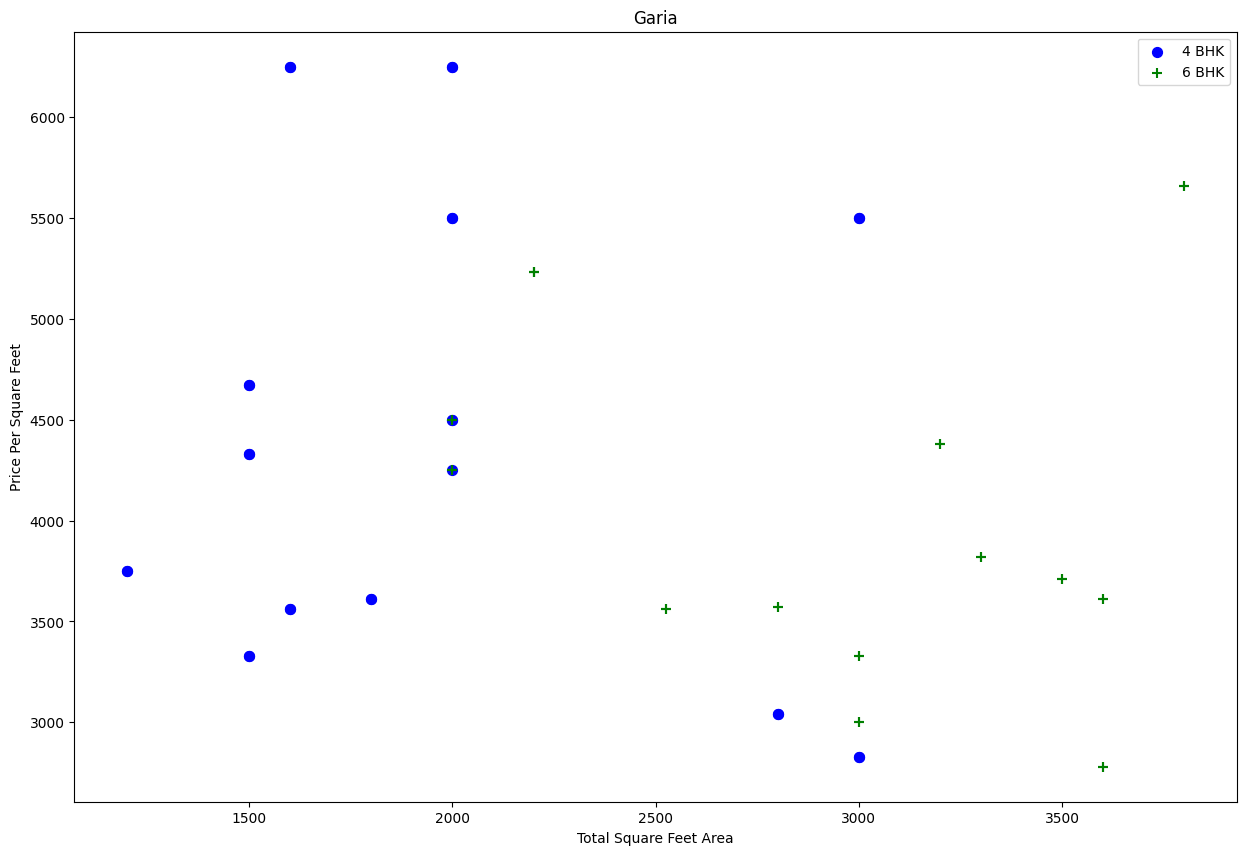

In [27]:
#scatter plot to visualize where same sqft variant bhk has anomaly pricing
def plot_scatt_chart(ds,location):
  bhk2=ds[(ds.Region==location)&(ds.BHK==4)]
  bhk3=ds[(ds.Region==location)&(ds.BHK==6)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.Total_Sqft,bhk2.Price_per_sqft,color='blue',label='4 BHK',s=50)
  plt.scatter(bhk3.Total_Sqft,bhk3.Price_per_sqft,marker='+',color='green',label='6 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()

plot_scatt_chart(ds7,"Garia")

In [28]:
def remove_outliers_bhk(ds):
  exclude_indices=np.array([])
  for location,location_df in ds.groupby('Region'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.Price_per_sqft),
          'std':np.std(bhk_df.Price_per_sqft),
          'count':bhk_df.shape[0]
      }
      for bhk,bhk_df in location_df.groupby('BHK'):
        stats= bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
  return ds.drop(exclude_indices,axis='index')

ds8=remove_outliers_bhk(ds7)
ds8.shape

(2104, 8)

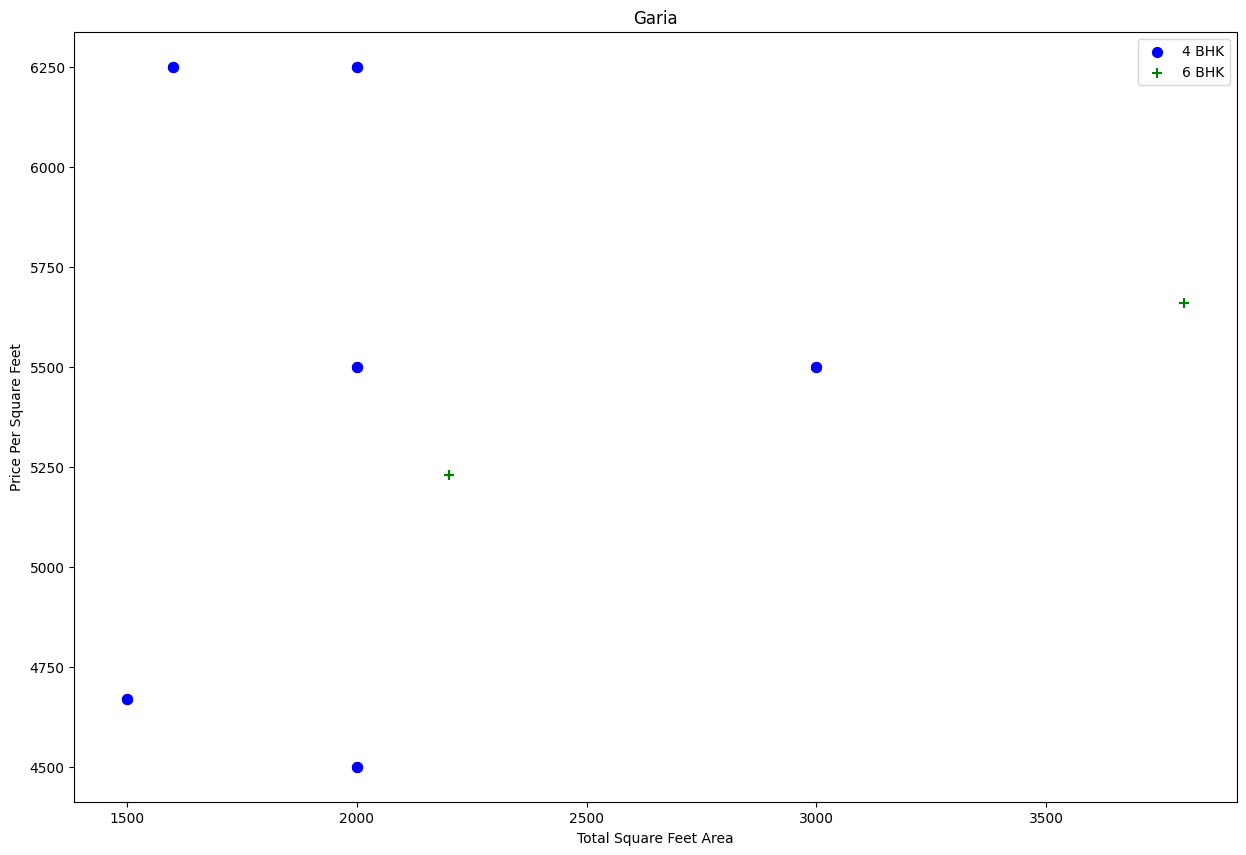

In [29]:
plot_scatt_chart(ds8,"Garia")

Text(0, 0.5, 'Count')

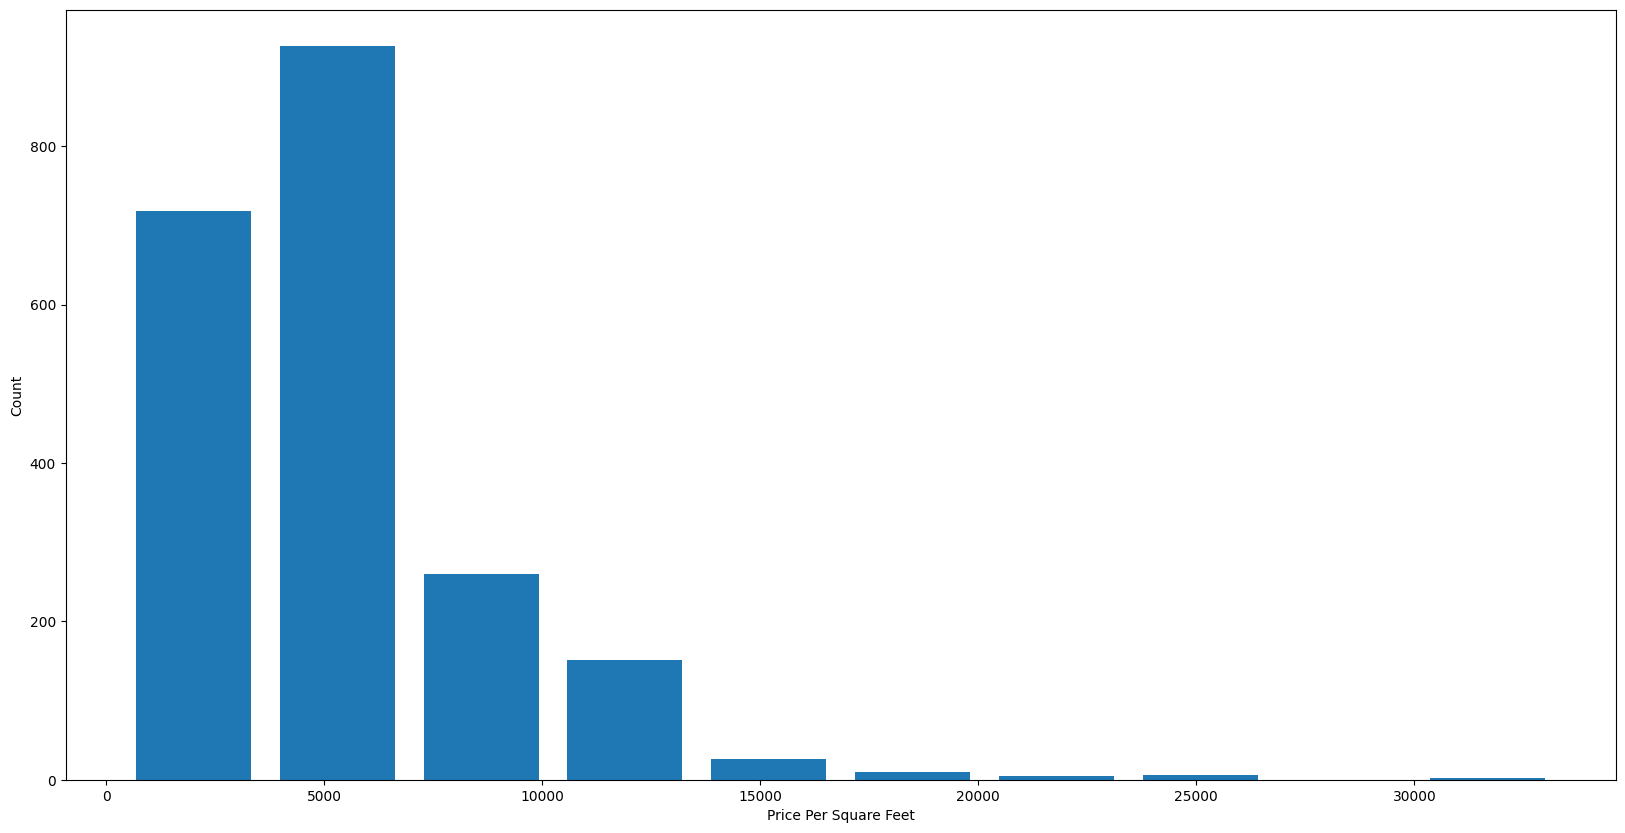

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(ds8.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
ds9=ds8.drop(['HOUSE_TYPE','Price_per_sqft'],axis='columns')
ds9.head()

,Flat_Price,EMI_Starts,BHK,Location,Total_Sqft,Region
0,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,Agarpara
1,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,Agarpara
2,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,Agarpara
3,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,Agarpara
4,8000000.0,39720.0,4.0,"Agarpara, Kolkata",1500.0,Agarpara


In [32]:
#hot_encoding or dummies
#model building
dummy = pd.get_dummies(ds9.Region)
dummy.head()

,Agarpara,Alipore,Amtala,Ariadaha,Ashokgarh,Baghajatin,Baghbazar,Bagpota,Baguiati,Baguihati,...,South Dum Dum,Srirampur,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,Ward No 113,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
ds10=pd.concat([ds9,dummy.drop('other',axis='columns')],axis='columns')
ds10.head()

,Flat_Price,EMI_Starts,BHK,Location,Total_Sqft,Region,Agarpara,Alipore,Amtala,Ariadaha,...,Sodepur,South Dum Dum,Srirampur,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,Ward No 113
0,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,Agarpara,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,Agarpara,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,Agarpara,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,Agarpara,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8000000.0,39720.0,4.0,"Agarpara, Kolkata",1500.0,Agarpara,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
ds11=ds10.drop('Region',axis='columns')
ds11.head()


,Flat_Price,EMI_Starts,BHK,Location,Total_Sqft,Agarpara,Alipore,Amtala,Ariadaha,Ashokgarh,...,Sodepur,South Dum Dum,Srirampur,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,Ward No 113
0,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4000000.0,21180.0,2.0,"Agarpara, Kolkata",1000.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5500000.0,29130.0,3.0,"Agarpara, Kolkata",1600.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8000000.0,39720.0,4.0,"Agarpara, Kolkata",1500.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
ds11=ds11.drop('Location',axis='columns')
ds11.head()

,Flat_Price,EMI_Starts,BHK,Total_Sqft,Agarpara,Alipore,Amtala,Ariadaha,Ashokgarh,Baghajatin,...,Sodepur,South Dum Dum,Srirampur,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,Ward No 113
0,4000000.0,21180.0,2.0,1000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4000000.0,21180.0,2.0,1000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5500000.0,29130.0,3.0,1600.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5500000.0,29130.0,3.0,1600.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8000000.0,39720.0,4.0,1500.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#removing dependent variables
X=ds11.drop('Flat_Price',axis='columns')
X.head(5)

,EMI_Starts,BHK,Total_Sqft,Agarpara,Alipore,Amtala,Ariadaha,Ashokgarh,Baghajatin,Baghbazar,...,Sodepur,South Dum Dum,Srirampur,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,Ward No 113
0,21180.0,2.0,1000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,21180.0,2.0,1000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,29130.0,3.0,1600.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29130.0,3.0,1600.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,39720.0,4.0,1500.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
Y=ds11.Flat_Price
Y.head(5)

0    4000000.0
1    4000000.0
2    5500000.0
3    5500000.0
4    8000000.0
Name: Flat_Price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)  #20% test samples (0.2) and 80% model training

In [39]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

0.9999717484793975

In [40]:
#creating Shuffle split for cross validation which randomizes the sample
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.99996839, 0.99994715, 0.99994701, 0.99995904, 0.999953  ])

In [43]:
def price_pred(Region,Total_Sqft,BHK,EMI_Starts):
  loc_index = np.where(X.columns==Region)[0][0]

  a=np.zeros(len(X.columns))
  a[0]=Total_Sqft
  a[1]=BHK
  #a[2]=EMI_Starts
  if loc_index >= 0:
    a[loc_index] = 1

  return classifier.predict([a])[0]

In [44]:
price_pred('Agarpara',1000,2,20000)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-138722.2035710915

In [45]:
price_pred('Garia',1200,3,20000)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72446.92023291881

In [46]:
price_pred('Barrackpore',1400,3,22000)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19956.85221502016

In [45]:
#Exporting to pickle file
import pickle
with open('west_bengal_estate_price.pickle','wb') as f:
  pickle.dump(classifier,f)

In [46]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))

In [49]:
#Flask-Server
"""from flask import Flask,request,jsonify
app= Flask(__name__)

@app.route('/get_location')
def get_location():
  response=jsonify({
      'Region': util.get_location()
  })
    response.headers.add('Access-Control-Allow-Origin','*')

if __name__=='__main__':
  print("Starting Python Flask Server For House Price Prediction")
  app.run()"""

Starting Python Flask Server For House Price Prediction
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Jul/2024 10:04:31] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [02/Jul/2024 10:04:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Jul/2024 10:05:18] "GET /hello HTTP/1.1" 200 -


In [ ]:
#ds4['Flat_Price']=ds4['Flat_Price'].strip(" ")
#ds4['EMI_Starts']=ds4['EMI_Starts'].strip(" ")
#ds4.head()

In [ ]:
#ds4['Price']=ds4['Flat_Price'].apply(lambda x:(denom := x.find('L'),
            #float(x[:denom].strip(" "))*100000 if denom!=-1 else float(x[:x.find('Cr')].strip(" "))*10000000 ))
#ds4.head()